In [11]:
import math, random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [12]:
from models.models import MF_Implicit, GMF_Implicit, NeuMF
from evaluation.utils import prepare_dataset, sample_train_batch
from evaluation.metrics import eval_hr_ndcg

In [13]:
n_users, n_items, test_df, train_df, train_ui = prepare_dataset("./data/ratings_reindexed.csv")

/Users/shreyasghorpade/Desktop/Projects/recommendationsystem/recommendationSystem/evaluation/utils.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_idx = pos.groupby("userId", group_keys=False).apply(


In [14]:
# Training MF implicit Model

model_mf = MF_Implicit(n_users, n_items, k=32).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_mf.parameters(), lr=8e-4, weight_decay=1e-6)

epochs = 30
results_mf = []
for e in range(1, epochs+1):
    model_mf.train()
    U,I,Y = sample_train_batch(train_df, n_items, train_ui, num_neg=4)
    U,I,Y = U.to(device), I.to(device), Y.to(device)
    optimizer.zero_grad()
    loss = criterion(model_mf(U,I), Y); loss.backward(); optimizer.step()

    if e==1 or e%2==0:
        hr, ndcg = eval_hr_ndcg(model_mf, test_df, train_ui, n_items, k=10, n_neg=100, device=device)
        print(f"Epoch {e:02d} | Loss: {loss.item():.4f} | HR@10: {hr:.4f} | NDCG@10: {ndcg:.4f}")
        results_mf.append({"epoch": e, "hr": hr, "ndcg": ndcg})
        
pd.DataFrame(results_mf).to_csv("results/mf_results.csv", index=False)
torch.save(model_mf.state_dict(), "results/mf_model.pth")

Epoch 01 | Loss: 0.6931 | HR@10: 0.1018 | NDCG@10: 0.0477
Epoch 02 | Loss: 0.6931 | HR@10: 0.1051 | NDCG@10: 0.0488
Epoch 04 | Loss: 0.6932 | HR@10: 0.1034 | NDCG@10: 0.0508
Epoch 06 | Loss: 0.6931 | HR@10: 0.1100 | NDCG@10: 0.0520
Epoch 08 | Loss: 0.6931 | HR@10: 0.1002 | NDCG@10: 0.0494
Epoch 10 | Loss: 0.6931 | HR@10: 0.0985 | NDCG@10: 0.0497
Epoch 12 | Loss: 0.6931 | HR@10: 0.1051 | NDCG@10: 0.0531
Epoch 14 | Loss: 0.6931 | HR@10: 0.1051 | NDCG@10: 0.0522
Epoch 16 | Loss: 0.6931 | HR@10: 0.1166 | NDCG@10: 0.0552
Epoch 18 | Loss: 0.6931 | HR@10: 0.1248 | NDCG@10: 0.0576
Epoch 20 | Loss: 0.6931 | HR@10: 0.1248 | NDCG@10: 0.0584
Epoch 22 | Loss: 0.6931 | HR@10: 0.1346 | NDCG@10: 0.0642
Epoch 24 | Loss: 0.6931 | HR@10: 0.1429 | NDCG@10: 0.0675
Epoch 26 | Loss: 0.6931 | HR@10: 0.1494 | NDCG@10: 0.0724
Epoch 28 | Loss: 0.6931 | HR@10: 0.1478 | NDCG@10: 0.0734
Epoch 30 | Loss: 0.6931 | HR@10: 0.1527 | NDCG@10: 0.0743


In [15]:
model_gmf = GMF_Implicit(n_users, n_items, k=32).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_gmf.parameters(), lr=8e-4, weight_decay=1e-6)

epochs = 30
results_gmf = []
for e in range(1, epochs+1):
    model_gmf.train()
    U,I,Y = sample_train_batch(train_df, n_items, train_ui, num_neg=4)
    U,I,Y = U.to(device), I.to(device), Y.to(device)
    optimizer.zero_grad()
    loss = criterion(model_gmf(U,I), Y); loss.backward(); optimizer.step()

    if e==1 or e%2==0:
        hr, ndcg = eval_hr_ndcg(model_gmf, test_df, train_ui, n_items, k=10, n_neg=100, device=device)
        print(f"Epoch {e:02d} | Loss: {loss.item():.4f} | HR@10: {hr:.4f} | NDCG@10: {ndcg:.4f}")
        results_gmf.append({"epoch": e, "hr": hr, "ndcg": ndcg})
        
pd.DataFrame(results_gmf).to_csv("results/gmf_results.csv", index=False)
torch.save(model_gmf.state_dict(), "results/gmf_model.pth")

Epoch 01 | Loss: 0.6931 | HR@10: 0.0936 | NDCG@10: 0.0392
Epoch 02 | Loss: 0.6929 | HR@10: 0.0969 | NDCG@10: 0.0402
Epoch 04 | Loss: 0.6924 | HR@10: 0.1051 | NDCG@10: 0.0442
Epoch 06 | Loss: 0.6919 | HR@10: 0.1051 | NDCG@10: 0.0456
Epoch 08 | Loss: 0.6915 | HR@10: 0.1117 | NDCG@10: 0.0476
Epoch 10 | Loss: 0.6910 | HR@10: 0.1084 | NDCG@10: 0.0475
Epoch 12 | Loss: 0.6905 | HR@10: 0.1166 | NDCG@10: 0.0512
Epoch 14 | Loss: 0.6900 | HR@10: 0.1182 | NDCG@10: 0.0532
Epoch 16 | Loss: 0.6896 | HR@10: 0.1297 | NDCG@10: 0.0578
Epoch 18 | Loss: 0.6891 | HR@10: 0.1248 | NDCG@10: 0.0575
Epoch 20 | Loss: 0.6886 | HR@10: 0.1248 | NDCG@10: 0.0594
Epoch 22 | Loss: 0.6881 | HR@10: 0.1330 | NDCG@10: 0.0629
Epoch 24 | Loss: 0.6877 | HR@10: 0.1363 | NDCG@10: 0.0654
Epoch 26 | Loss: 0.6872 | HR@10: 0.1330 | NDCG@10: 0.0657
Epoch 28 | Loss: 0.6867 | HR@10: 0.1396 | NDCG@10: 0.0693
Epoch 30 | Loss: 0.6863 | HR@10: 0.1527 | NDCG@10: 0.0742


In [16]:
model_neumf = NeuMF(n_users, n_items, k_gmf=32, k_mlp=32, mlp_layers=(64,32,16)).to(device)
opt = torch.optim.Adam(model_neumf.parameters(), lr=8e-4, weight_decay=1e-6)
crit = nn.BCEWithLogitsLoss()

epochs = 30
results_neumf = []
for e in range(1, epochs+1):
    model_neumf.train()
    # (optional) sample a subset of users each epoch for speed on larger data
    batch_users = None
    U,I,Y = sample_train_batch(train_df, n_items, train_ui, num_neg=4, users_subset=batch_users)
    U,I,Y = U.to(device), I.to(device), Y.to(device)
    opt.zero_grad()
    loss = crit(model_neumf(U,I), Y); loss.backward(); opt.step()

    if e==1 or e%2==0:
        hr, ndcg = eval_hr_ndcg(model_neumf, test_df, train_ui, n_items, k=10, n_neg=100, device=device)
        print(f"Epoch {e:02d} | BCE: {loss.item():.4f} | HR@10: {hr:.4f} | NDCG@10: {ndcg:.4f}")
        results_neumf.append({'epoch': e, "hr": hr, "ndcg":ndcg})
        
pd.DataFrame(results_neumf).to_csv("results/neumf_results.csv", index=False)
torch.save(model_neumf.state_dict(), "results/neumf_model.pth")

Epoch 01 | BCE: 0.6914 | HR@10: 0.1264 | NDCG@10: 0.0605
Epoch 02 | BCE: 0.6898 | HR@10: 0.1609 | NDCG@10: 0.0865
Epoch 04 | BCE: 0.6865 | HR@10: 0.2841 | NDCG@10: 0.1555
Epoch 06 | BCE: 0.6832 | HR@10: 0.4236 | NDCG@10: 0.2464
Epoch 08 | BCE: 0.6799 | HR@10: 0.5123 | NDCG@10: 0.3143
Epoch 10 | BCE: 0.6768 | HR@10: 0.5632 | NDCG@10: 0.3582
Epoch 12 | BCE: 0.6738 | HR@10: 0.6010 | NDCG@10: 0.3859
Epoch 14 | BCE: 0.6707 | HR@10: 0.6141 | NDCG@10: 0.3982
Epoch 16 | BCE: 0.6681 | HR@10: 0.6223 | NDCG@10: 0.4133
Epoch 18 | BCE: 0.6656 | HR@10: 0.6486 | NDCG@10: 0.4305
Epoch 20 | BCE: 0.6630 | HR@10: 0.6437 | NDCG@10: 0.4371
Epoch 22 | BCE: 0.6604 | HR@10: 0.6470 | NDCG@10: 0.4417
Epoch 24 | BCE: 0.6578 | HR@10: 0.6700 | NDCG@10: 0.4534
Epoch 26 | BCE: 0.6550 | HR@10: 0.6864 | NDCG@10: 0.4619
Epoch 28 | BCE: 0.6522 | HR@10: 0.6962 | NDCG@10: 0.4672
Epoch 30 | BCE: 0.6494 | HR@10: 0.7061 | NDCG@10: 0.4753


In [17]:
mf = pd.read_csv("results/mf_results.csv")
gmf = pd.read_csv("results/gmf_results.csv")
neumf = pd.read_csv("results/neumf_results.csv")

# Check
display(mf.head(), gmf.head(), neumf.head())

,epoch,hr,ndcg
0,1,0.101806,0.047657
1,2,0.105090,0.048822
2,4,0.103448,0.050753
3,6,0.110016,0.052000
4,8,0.100164,0.049396


,epoch,hr,ndcg
0,1,0.093596,0.039179
1,2,0.096880,0.040208
2,4,0.105090,0.044244
3,6,0.105090,0.045615
4,8,0.111658,0.047646


,epoch,hr,ndcg
0,1,0.126437,0.060541
1,2,0.160920,0.086488
2,4,0.284072,0.155461
3,6,0.423645,0.246432
4,8,0.512315,0.314265


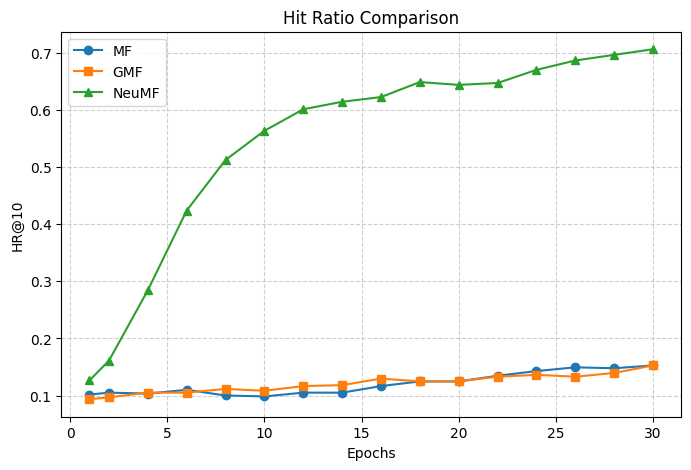

In [18]:
# Plot HR@10
plt.figure(figsize=(8,5))
plt.plot(mf["epoch"], mf["hr"], label="MF", marker="o")
plt.plot(gmf["epoch"], gmf["hr"], label="GMF", marker="s")
plt.plot(neumf["epoch"], neumf["hr"], label="NeuMF", marker="^")
plt.xlabel("Epochs"); plt.ylabel("HR@10"); plt.title("Hit Ratio Comparison")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6); plt.show()

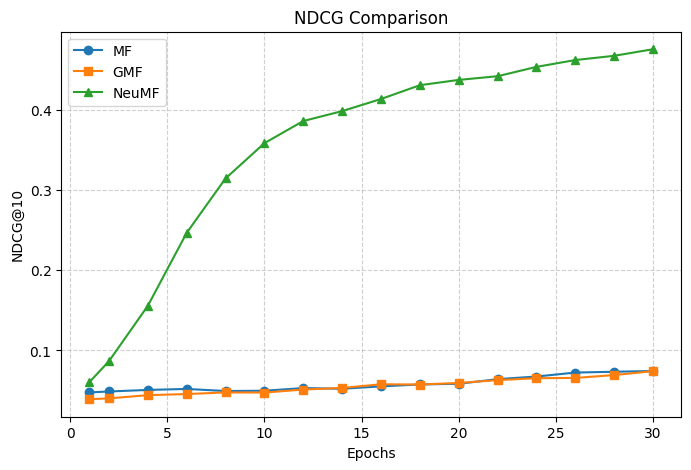

In [19]:
plt.figure(figsize=(8,5))
plt.plot(mf["epoch"], mf["ndcg"], label="MF", marker="o")
plt.plot(gmf["epoch"], gmf["ndcg"], label="GMF", marker="s")
plt.plot(neumf["epoch"], neumf["ndcg"], label="NeuMF", marker="^")
plt.xlabel("Epochs"); plt.ylabel("NDCG@10"); plt.title("NDCG Comparison")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6); plt.show()

In [20]:
# Final table
summary = pd.DataFrame({
    "Model": ["MF", "GMF", "NeuMF"],
    "Best HR@10": [mf["hr"].max(), gmf["hr"].max(), neumf["hr"].max()],
    "Best NDCG@10": [mf["ndcg"].max(), gmf["ndcg"].max(), neumf["ndcg"].max()]
})
display(summary)

,Model,Best HR@10,Best NDCG@10
0,MF,0.152709,0.074315
1,GMF,0.152709,0.074196
2,NeuMF,0.706076,0.475340
